In [21]:
!pip install scipy

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.4 kB 110.1 kB/s eta 0:00:01
     ------------ ------------------------- 20.5/60.4 kB 110.1 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.4 kB 131.3 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 175.0 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 175.0 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 175.0 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 133.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/44.1 MB 1.3 MB/s eta 0:00:35
   ---------------------------------------- 0.1/44.1 MB 1.1 MB/s eta 0:00:41
   ---------------------------------------- 0.1/44.1 MB 558.5 kB/s eta 

In [22]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

In [2]:
# Read the dataset

df = pd.read_csv('./NYPD_Arrest_Data__Year_to_Date_.csv')

In [3]:
# Inspect the Dataset

df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170095 entries, 0 to 170094
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                170095 non-null  int64  
 1   ARREST_DATE               170095 non-null  object 
 2   PD_CD                     170095 non-null  int64  
 3   PD_DESC                   170095 non-null  object 
 4   KY_CD                     170082 non-null  float64
 5   OFNS_DESC                 170095 non-null  object 
 6   LAW_CODE                  170095 non-null  object 
 7   LAW_CAT_CD                168838 non-null  object 
 8   ARREST_BORO               170095 non-null  object 
 9   ARREST_PRECINCT           170095 non-null  int64  
 10  JURISDICTION_CODE         170095 non-null  int64  
 11  AGE_GROUP                 170095 non-null  object 
 12  PERP_SEX                  170095 non-null  object 
 13  PERP_RACE                 170095 non-null  o

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,1.700950e+05,170095.000000,170082.000000,170095.000000,170095.000000,1.700950e+05,170095.000000,170095.000000,170095.000000
mean,2.683705e+08,425.242200,249.766342,63.423569,0.945918,1.005863e+06,208326.176925,40.738196,-73.921525
std,4.027782e+06,275.312255,148.500439,34.596068,7.683909,2.152952e+04,29737.941320,0.128134,0.195134
min,2.611809e+08,2.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.253187
25%,2.649555e+08,114.000000,113.000000,40.000000,0.000000,9.913600e+05,186065.000000,40.677251,-73.974365
50%,2.685036e+08,397.000000,236.000000,62.000000,0.000000,1.005511e+06,206851.000000,40.734434,-73.923234
75%,2.718261e+08,705.000000,344.000000,101.000000,0.000000,1.017933e+06,236175.000000,40.814867,-73.878333
max,2.752350e+08,997.000000,995.000000,123.000000,97.000000,1.067185e+06,271819.000000,40.912714,0.000000


In [4]:
# Check for missing values

df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [5]:
# Drop rows with missing values

df.dropna(inplace=True)

In [6]:
# Convert arrest date and time columns to datetime objects

df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

In [7]:
# Extract month, day, hour, weekday, and season from arrest date and time columns

df["MONTH"] = df["ARREST_DATE"].dt.month
df["DAY"] = df["ARREST_DATE"].dt.day
df["WEEKDAY"] = df["ARREST_DATE"].dt.day_name()
df["SEASON"] = df["ARREST_DATE"].dt.month.apply(lambda x: "Winter" if x in [12, 1, 2] else "Spring" if x in [3, 4, 5] else "Summer" if x in [6, 7, 8] else "Fall")

'''
Explanation of the if else statement above:
if x in [12, 1, 2] then "Winter"
else if x in [3, 4, 5] then "Spring"
else if x in [6, 7, 8] then "Summer"
else "Fall"
'''

'\nExplanation of the if else statement above:\nif x in [12, 1, 2] then "Winter"\nelse if x in [3, 4, 5] then "Spring"\nelse if x in [6, 7, 8] then "Summer"\nelse "Fall"\n'

In [8]:
# Map arrest key code to offense description using a lookup table

lookup = pd.read_csv("./NYPD_Arrest_Data__Year_to_Date_.csv")
df = df.merge(lookup, on="ARREST_KEY", how="left")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168825 entries, 0 to 168824
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ARREST_KEY                  168825 non-null  int64         
 1   ARREST_DATE_x               168825 non-null  datetime64[ns]
 2   PD_CD_x                     168825 non-null  int64         
 3   PD_DESC_x                   168825 non-null  object        
 4   KY_CD_x                     168825 non-null  float64       
 5   OFNS_DESC_x                 168825 non-null  object        
 6   LAW_CODE_x                  168825 non-null  object        
 7   LAW_CAT_CD_x                168825 non-null  object        
 8   ARREST_BORO_x               168825 non-null  object        
 9   ARREST_PRECINCT_x           168825 non-null  int64         
 10  JURISDICTION_CODE_x         168825 non-null  int64         
 11  AGE_GROUP_x                 168825 non-

In [10]:
# Rename columns for clarity

df.rename(columns={"OFNS_DESC_x": "OFFENSE_DESCRIPTION", "LAW_CAT_CD_x": "LAW_CATEGORY_CODE", "AGE_GROUP_x": "AGE_GROUP", "PERP_SEX_x": "SEX", "PERP_RACE_x": "RACE", "ARREST_DATE_x": "ARREST_DATE", "PD_CD_x": "PD_CD", "PD_DESC_x": "PD_DESC", "KY_CD_x": "KY_CD", "LAW_CODE_x": "LAW_CODE", "ARREST_BORO_x": "ARREST_BORO", "ARREST_PRECINCT_x": "ARREST_PRECINCT", "JURISDICTION_CODE_x": "JURISDICTION_CODE", "X_COORD_CD_x": "X_COORD_CD", "Y_COORD_CD_x": "Y_COORD_CD", "Latitude_x": "Latitude", "Longitude_x": "Longitude", "New Georeferenced Column_x": "New Georeferenced Column"}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168825 entries, 0 to 168824
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   ARREST_KEY                  168825 non-null  int64         
 1   ARREST_DATE                 168825 non-null  datetime64[ns]
 2   PD_CD                       168825 non-null  int64         
 3   PD_DESC                     168825 non-null  object        
 4   KY_CD                       168825 non-null  float64       
 5   OFFENSE_DESCRIPTION         168825 non-null  object        
 6   LAW_CODE                    168825 non-null  object        
 7   LAW_CATEGORY_CODE           168825 non-null  object        
 8   ARREST_BORO                 168825 non-null  object        
 9   ARREST_PRECINCT             168825 non-null  int64         
 10  JURISDICTION_CODE           168825 non-null  int64         
 11  AGE_GROUP                   168825 non-

In [13]:
# The unique values in the RACE column
df["RACE"].unique()


array(['BLACK', 'WHITE', 'ASIAN / PACIFIC ISLANDER', 'WHITE HISPANIC',
       'BLACK HISPANIC', 'UNKNOWN', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

In [15]:
# Compare the arrest rates of black people and other races by offense description

offense_table = pd.crosstab(df["OFFENSE_DESCRIPTION"], df["RACE"], normalize="index")
offense_table["Black/Other Ratio"] = (offense_table["BLACK"] / offense_table["WHITE"] + 
                                      offense_table["ASIAN / PACIFIC ISLANDER"] + 
                                      offense_table["WHITE HISPANIC"] +
                                      offense_table["BLACK HISPANIC"] +
                                      offense_table["AMERICAN INDIAN/ALASKAN NATIVE"] + 
                                      offense_table["UNKNOWN"])
offense_table.sort_values(by="Black/Other Ratio", ascending=False, inplace=True)
offense_table.head(10)

RACE,AMERICAN INDIAN/ALASKAN NATIVE,ASIAN / PACIFIC ISLANDER,BLACK,BLACK HISPANIC,UNKNOWN,WHITE,WHITE HISPANIC,Black/Other Ratio
OFFENSE_DESCRIPTION,,,,,,,,
GAMBLING,0.013514,0.327703,0.391892,0.037162,0.010135,0.006757,0.212838,58.601351
MURDER & NON-NEGL. MANSLAUGHTE,0.000702,0.030197,0.658006,0.102528,0.012640,0.020365,0.175562,32.631974
ENDAN WELFARE INCOMP,0.000000,0.035088,0.491228,0.052632,0.035088,0.017544,0.368421,28.491228
DISORDERLY CONDUCT,0.000000,0.027778,0.611111,0.111111,0.000000,0.027778,0.222222,22.361111
THEFT OF SERVICES,0.000000,0.054054,0.549550,0.117117,0.000000,0.027027,0.252252,20.756757
JOSTLING,0.000000,0.010753,0.193548,0.182796,0.000000,0.010753,0.602151,18.795699
FRAUDULENT ACCOSTING,0.000000,0.069767,0.744186,0.069767,0.000000,0.046512,0.069767,16.209302
ROBBERY,0.002081,0.028522,0.587710,0.103195,0.011874,0.050802,0.215816,11.930163
FORGERY,0.001930,0.059437,0.529139,0.101119,0.011964,0.049402,0.247009,11.132396


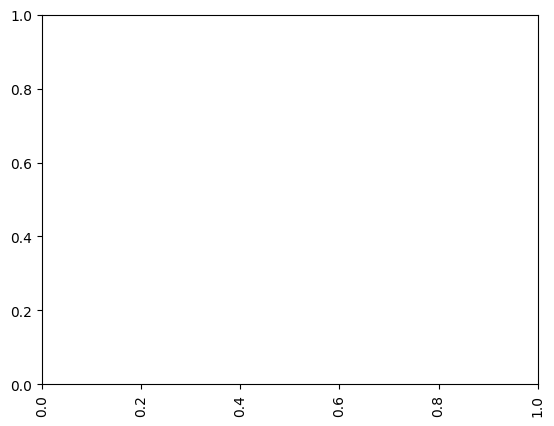

In [18]:
# Visualize the arrest rates of black people and other races by offense description
px.bar(offense_table, x=offense_table.index, y="BLACK", title="Arrest Rates of Black People and Other Races by Offense Description in NYC in 2023")
plt.xticks(rotation=90)
plt.show()

In [23]:
# Perform a chi-square test to check if the arrest rates of black people and other races by offense description are independent or not

chi2, p, dof, expected = chi2_contingency(offense_table[["BLACK", "WHITE", "ASIAN/PAC.ISL", "AMER IND", "UNKNOWN"]])
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

KeyError: "['ASIAN/PAC.ISL', 'AMER IND'] not in index"